### Description

This notebook provides code in R for creating visualization plots of different metrics and comparing various models/pipelines. 

### Section 0: 

Human rated score vs muliple pipelines score graphs

In [ ]:
xaxis_label = 'Mini-LM' 

file_path <- "../STS_results/Sentence_transformers/all-MiniLM-L6-v2/minilm_sts_results.csv"
save_dir <- '..//Graphs//STS//Pipelines vs. HRS Graphs/'

In [ ]:
# Load data from a CSV file located at 'file_path' into a dataframe 'data'
data <- read.csv(file_path)

calculated_sim_columns <- colnames(data)[(ncol(data) - 2):(ncol(data))]

# Loop through each of these calculated similarity columns
for (col_name in calculated_sim_columns) {
    
  par(mar = c(9, 15, 5, 0.6))   # Set margins for plotting (bottom, left, top, right)

  calculated_sim <- data[, col_name]
    
  # Normalize a column named 'similarity_score' in the dataframe by dividing by 5, the max score is 5
  human_score <- data$similarity_score / 5.0

  if (grepl("b_", col_name)) {
    model_name_axis <- paste('b', xaxis_label, sep = "")
  } 
  else if (grepl("p_", col_name)) {
    model_name_axis <- paste('p', xaxis_label, sep = "")
  } 
   else {
    model_name_axis <- xaxis_label
  }
    
  pdf_file_path <- paste(save_dir, model_name_axis, "_plot.pdf", sep = "")
  pdf(pdf_file_path)

 # Plot the human scores against the calculated similarity scores with customization
  plot(human_score, calculated_sim,
       xlab = 'HRS', ylab = model_name_axis,
       pch = 3, frame = FALSE, 
       cex.axis = 1.3, cex.lab = 1.3)
    
  abline(lm(calculated_sim ~ human_score), col = "blue", lwd = 1.5)
  
  #cat("column name :", col_name, "\n")
  dev.off()
  cat("Scatter plot saved in the folder:", pdf_file_path, "\n")
}


### Section1. STS Dataset Graphs

Description: The following cells creates a plot to visualize the Pearson and Spearman correlation scores for the STS dataset across different pipelines. It adds titles, axis labels, and a legend for clarity.



####  RHO Graph

In [44]:
# define model names

models <- c('JSI', 'bJSI', 'pJSI', 
            'TFIDF', 'bTFIDF', 'pTFIDF', 
            'GLV', 'bGLV', 'pGLV', 
            'FT', 'bFT', 'pFT',
            'BERT-Avg.', 'bBERT-Avg.', 'pBERT-Avg.',
            'BERT-CLS', 'bBERT-CLS', 'pBERT-CLS',
            'Mini-LM', 'bMini-LM', 'pMini-LM',
            'ST-Roberta', 'bST-Roberta', 'pST-Roberta',
            'USE', 'bUSE', 'pUSE'
           
           )

# Define correlation scores for STS dataset

sts_pearson_score <- c(0.567, 0.649, 0.698,
                       0.590, 0.614, 0.642,
                       0.4, 0.476, 0.663, 
                       0.472, 0.536, 0.713,
                       0.592, 0.586, 0.614,
                       0.313, 0.341, 0.408,
                       0.837, 0.834, 0.819,
                       0.876, 0.854, 0.818,
                       0.806, 0.801, 0.781
                        ) 

sts_spearman_score <- c(0.575, 0.655, 0.707,
                       0.591, 0.614, 0.635,
                       0.445, 0.517, 0.665, 
                       0.487, 0.548, 0.706,
                       0.592, 0.585, 0.602,
                       0.344, 0.372, 0.437,
                       0.824, 0.820, 0.804,
                       0.873, 0.846, 0.806,
                       0.795, 0.789, 0.767
                        ) 


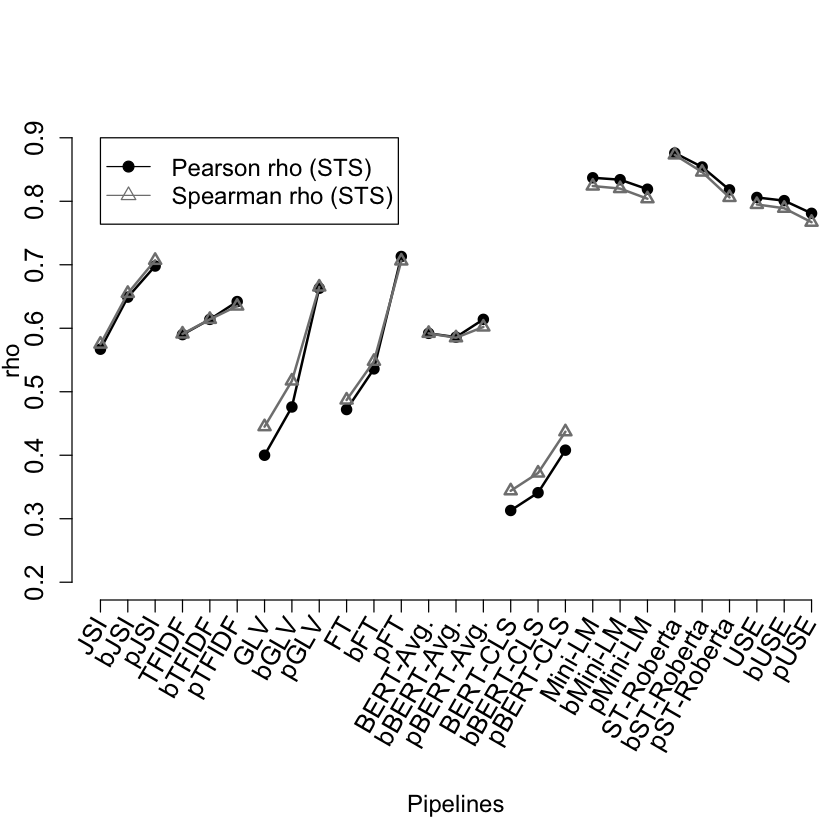

In [45]:
# Set up the file path for saving the plot as a PDF in the Graphs directory
pdf_file_path <- paste('..//Graphs/', 
                       "sts_rho_graph", ".pdf", sep = "")


# Open a PDF device with specified width to save the generated plots
pdf(pdf_file_path, width = 7)

# Set the plot margins (bottom, left, top, right) to improve layout aesthetics
par(mar = c(10, 3, 5, 0))

# Initialize a plot with no actual points or lines (type = "n") to set up axes, labels, and limits
plot(1:length(models), sts_pearson_score, type="n",
       xaxt = "n",
       xlab = "", ylab = "",
       pch = 19, frame = FALSE, 
       ylim=c(0.2, 0.9),
       cex.axis = 1.3, cex.lab = 1.3)

# Add titles for x and y axes with specific label sizes and positions
title(xlab = "Pipelines", line = 8, cex.lab=1.2)
title(ylab = "rho", line = 2, cex.lab=1.2) 

# Draw line segments for Pearson correlation scores with plotting character and line width

lines(1:3, sts_pearson_score[1:3], type = "o", pch = 19, lwd=2)
lines(4:6, sts_pearson_score[4:6], type = "o", pch = 19,lwd=2)
lines(7:9, sts_pearson_score[7:9], type = "o", pch = 19, lwd=2)
lines(10:12, sts_pearson_score[10:12], type = "o", pch = 19, lwd=2)
lines(13:15, sts_pearson_score[13:15], type = "o", pch = 19, lwd=2)
lines(16:18, sts_pearson_score[16:18], type = "o", pch = 19, lwd=2)
lines(19:21, sts_pearson_score[19:21], type = "o", pch = 19, lwd=2)
lines(22:24, sts_pearson_score[22:24], type = "o", pch = 19, lwd=2)
lines(25:27, sts_pearson_score[25:27], type = "o", pch = 19, lwd=2)


lines(1:3, sts_spearman_score[1:3], type = "o", pch = 2,col = "#808080", lwd=2)
lines(4:6, sts_spearman_score[4:6], type = "o", pch = 2, col = "#808080", lwd=2)
lines(7:9, sts_spearman_score[7:9], type = "o", pch = 2, col = "#808080", lwd=2)
lines(10:12, sts_spearman_score[10:12], type = "o", pch = 2, col = "#808080", lwd=2)
lines(13:15, sts_spearman_score[13:15], type = "o", pch = 2, col = "#808080", lwd=2)
lines(16:18, sts_spearman_score[16:18], type = "o", pch = 2, col = "#808080", lwd=2)
lines(19:21, sts_spearman_score[19:21], type = "o", pch = 2, col = "#808080", lwd=2)
lines(22:24, sts_spearman_score[22:24], type = "o", pch = 2, col = "#808080", lwd=2)
lines(25:27, sts_spearman_score[25:27], type = "o", pch = 2, col = "#808080", lwd=2)


# Customize x-axis with specified tick positions and prevent default labels from showing
axis(1, at = 1:length(models), labels = FALSE, las = 1, cex.axis = 2)

# Add rotated text labels for models beneath the x-axis
text(1:length(models), par("usr")[3]-0.03, 
     srt = 60, adj = 1, xpd = TRUE,
     labels = paste(models), cex = 1.3)

# Add a legend to the plot, specifying the position, labels, colors, line types, and symbols
legend(1, 0.9, legend = c("Pearson rho (STS)", "Spearman rho (STS)"), 
       col = c("black", "#808080"), 
       lty = 19, pch = c(19, 2), cex = 1.2)

# Close the PDF device to save the plot
dev.off()

#### Pipelines Performance Graph

In [46]:
models <- c('JSI', 'bJSI', 'pJSI', 
            'TFIDF', 'bTFIDF', 'pTFIDF', 
            'GLV', 'bGLV', 'pGLV', 
            'FT', 'bFT', 'pFT',
            'BERT-Avg.', 'bBERT-Avg.', 'pBERT-Avg.',
            'BERT-CLS', 'bBERT-CLS', 'pBERT-CLS',
            'Mini-LM', 'bMini-LM', 'pMini-LM',
            'ST-Roberta', 'bST-Roberta', 'pST-Roberta',
           'USE', 'bUSE', 'pUSE')
           
           
precision_score <- c(0.772, 0.772, 0.769,
                     0.773, 0.775, 0.786,
                     0.774, 0.766, 0.775,
                     0.776, 0.774, 0.772,
                     0.778, 0.775, 0.784,
                     0.785, 0.783, 0.814,
                     0.754, 0.752, 0.757,
                     0.784, 0.782, 0.784,
                     0.755, 0.757, 0.761
                    ) 

recall_score <- c(0.795, 0.84, 0.853,
                  0.761, 0.783, 0.777,
                  0.76, 0.81, 0.851,
                  0.796, 0.819, 0.867,
                  0.77, 0.768, 0.745,
                  0.573, 0.593, 0.591,
                  0.909, 0.91, 0.908,
                  0.899, 0.902, 0.888,
                  0.903, 0.902, 0.897
                        ) 


f1_score <- c(0.783, 0.805, 0.809,
              0.767, 0.779, 0.782,
              0.767, 0.787, 0.812,
              0.786, 0.796, 0.817,
             0.774, 0.772, 0.764,
              0.662, 0.675, 0.685,
              0.824, 0.823, 0.826,
              0.838, 0.838, 0.832,
              0.822, 0.823, 0.824
             ) 



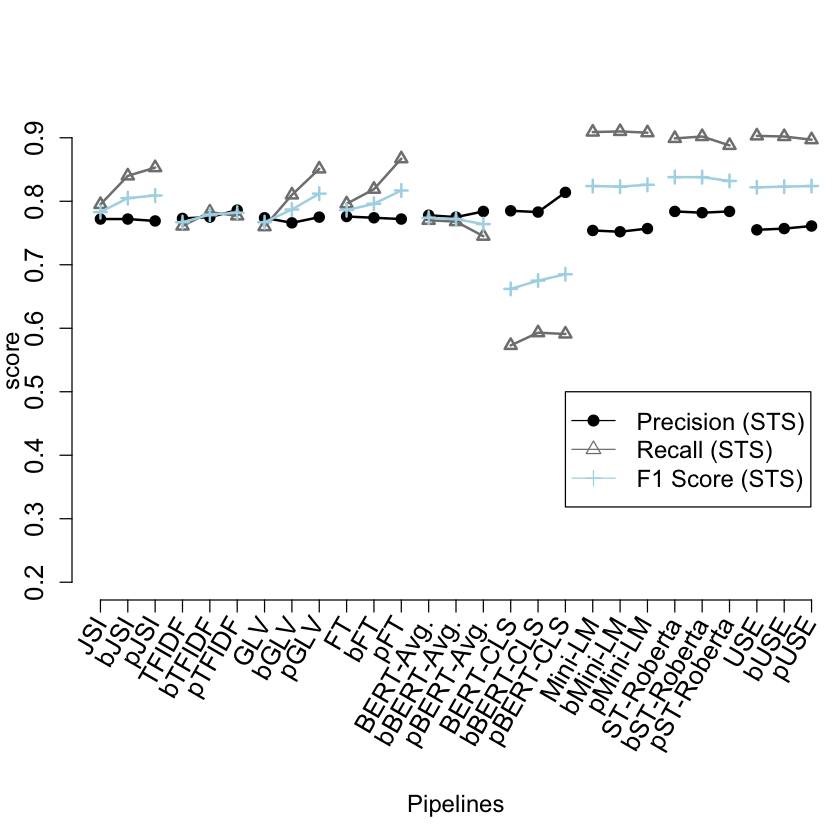

In [47]:
pdf_file_path <- paste('..//Graphs//STS/', "STS_reuse_results", ".pdf", sep = "")


#pdf(pdf_file_path, width = 7)
par(mar = c(10, 3, 5, 0))

# Initialize a plot with no actual points or lines (type = "n") to set up axes, labels, and limits

plot(1:length(models), precision_score, type="n",
       xaxt = "n",
       xlab = "", ylab = "",
       pch = 19, frame = FALSE, 
       ylim=c(0.2, 0.9),
       cex.axis = 1.3, cex.lab = 1.3)

title(xlab = "Pipelines", line = 8, cex.lab=1.2)
title(ylab = "score", line = 2, cex.lab=1.2) 

# Draw line segments for Precision scores with plotting character and line width

lines(1:3, precision_score[1:3], type = "o", pch = 19, lwd=2)
lines(4:6, precision_score[4:6], type = "o", pch = 19,lwd=2)
lines(7:9, precision_score[7:9], type = "o", pch = 19, lwd=2)
lines(10:12, precision_score[10:12], type = "o", pch = 19, lwd=2)
lines(13:15, precision_score[13:15], type = "o", pch = 19, lwd=2)
lines(16:18, precision_score[16:18], type = "o", pch = 19, lwd=2)
lines(19:21, precision_score[19:21], type = "o", pch = 19, lwd=2)
lines(22:24, precision_score[22:24], type = "o", pch = 19, lwd=2)
lines(25:27, precision_score[25:27], type = "o", pch = 19, lwd=2)

# Draw line segments for Recall scores with plotting character and line width

lines(1:3, recall_score[1:3], type = "o", pch = 2,col = "#808080", lwd=2)
lines(4:6, recall_score[4:6], type = "o", pch = 2, col = "#808080", lwd=2)
lines(7:9, recall_score[7:9], type = "o", pch = 2, col = "#808080", lwd=2)
lines(10:12, recall_score[10:12], type = "o", pch = 2, col = "#808080", lwd=2)
lines(13:15, recall_score[13:15], type = "o", pch = 2, col = "#808080", lwd=2)
lines(16:18, recall_score[16:18], type = "o", pch = 2, col = "#808080", lwd=2)
lines(19:21, recall_score[19:21], type = "o", pch = 2, col = "#808080", lwd=2)
lines(22:24, recall_score[22:24], type = "o", pch = 2, col = "#808080", lwd=2)
lines(25:27, recall_score[25:27], type = "o", pch = 2, col = "#808080", lwd=2)

# Draw line segments for F1 scores with plotting character and line width

lines(1:3, f1_score[1:3], type = "o", pch = 3,col = "#ADD8E6", lwd=2)
lines(4:6, f1_score[4:6], type = "o", pch = 3, col = "#ADD8E6", lwd=2)
lines(7:9, f1_score[7:9], type = "o", pch = 3, col = "#ADD8E6", lwd=2)
lines(10:12, f1_score[10:12], type = "o", pch = 3, col = "#ADD8E6", lwd=2)
lines(13:15, f1_score[13:15], type = "o", pch = 3, col = "#ADD8E6", lwd=2)
lines(16:18, f1_score[16:18], type = "o", pch = 3, col = "#ADD8E6", lwd=2)
lines(19:21, f1_score[19:21], type = "o", pch = 3, col = "#ADD8E6", lwd=2)
lines(22:24, f1_score[22:24], type = "o", pch = 3, col = "#ADD8E6", lwd=2)
lines(25:27, f1_score[25:27], type = "o", pch = 3, col = "#ADD8E6", lwd=2)


axis(1, at = 1:length(models), labels = FALSE, las = 1, cex.axis = 2)

text(1:length(models), par("usr")[3]-0.03, 
     srt = 60, adj = 1, xpd = TRUE,
     labels = paste(models), cex = 1.3)

legend(18, 0.5, legend = c("Precision (STS)", "Recall (STS)",  "F1 Score (STS)"), 
       col = c("black", "#808080", "#ADD8E6"), 
       lty = 19, pch = c(19, 2, 3), cex = 1.2)

#dev.off()

### Section 2: Industrial Dataset Graphs 

Description: The following cells creates a plot to visualize the Pearson and Spearman correlation scores for the industrial dataset (Alstom) across different pipelines. It adds titles, axis labels, and a legend for clarity.


In [48]:
models <- c('JSI', 'bJSI', 'pJSI', 
            'TFIDF', 'bTFIDF', 'pTFIDF', 
            'GLV', 'bGLV', 'pGLV', 
            'FT', 'bFT', 'pFT',
            'BERT-Avg.', 'bBERT-Avg.', 'pBERT-Avg.',
            'BERT-CLS', 'bBERT-CLS', 'pBERT-CLS',
            'Mini-LM', 'bMini-LM', 'pMini-LM',
            'ST-Roberta', 'bST-Roberta', 'pST-Roberta',
            'USE', 'bUSE', 'pUSE'
           
           )

alstom_pearson_score <- c( 0.502, 0.466, 0.457,
                           0.466, 0.462, 0.490,
                           0.254, 0.308, 0.278, 
                           0.171, 0.302, 0.407,
                           0.329, 0.301, 0.443,
                           0.26, 0.448, 0.227,
                           0.459, 0.430, 0.433,
                           0.519, 0.510, 0.483,
                           0.561, 0.505, 0.444
                            ) 

alstom_spearman_score <- c(0.462, 0.418, 0.461,
                           0.481, 0.445, 0.512,
                           0.335, 0.436, 0.408, 
                           0.291, 0.353, 0.462,
                           0.288, 0.261, 0.403,
                           0.178, 0.401, 0.246,
                           0.476, 0.452, 0.441,
                           0.509, 0.540, 0.523,
                           0.57, 0.479, 0.498
                            )

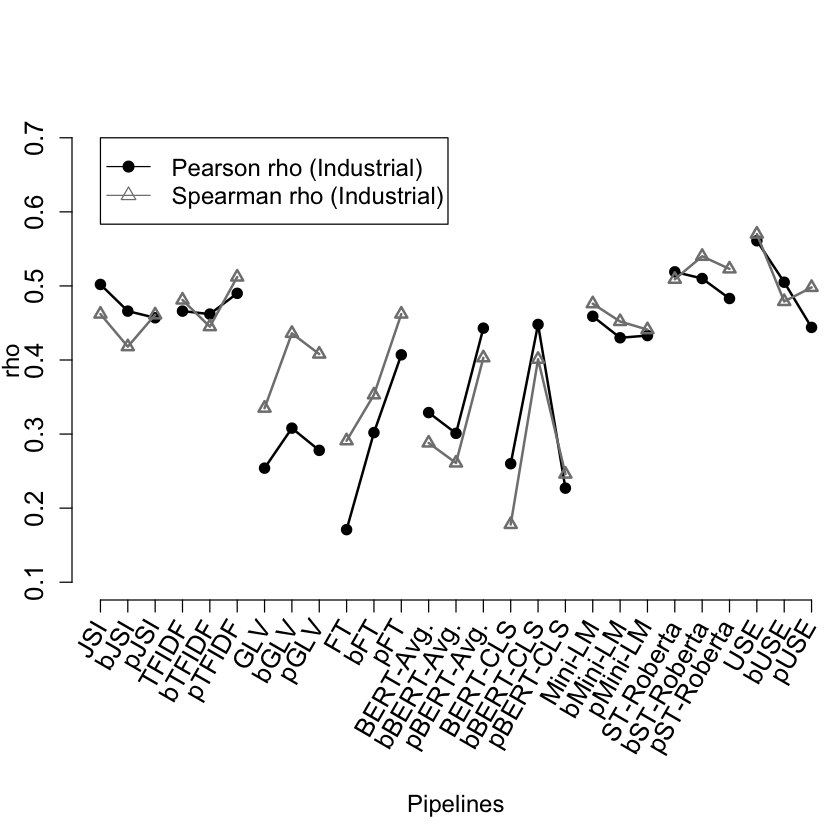

In [50]:
#pdf_file_path <- paste('..//Graphs/', 'alstom_rho_graph', ".pdf", sep = "")

#pdf(pdf_file_path, width = 7)
par(mar = c(10, 3, 5, 0))

plot(1:length(models), alstom_pearson_score, type="n",
       xaxt = "n",
       xlab = "", ylab = "",
       pch = 19, frame = FALSE, 
       ylim=c(0.1, 0.7),
       cex.axis = 1.3, cex.lab = 1.3)

title(xlab = "Pipelines", line = 8, cex.lab=1.2)
title(ylab = "rho", line = 2, cex.lab=1.2) 

# Overlay Person correlation scores in a different color and plotting character

lines(1:3, alstom_pearson_score[1:3], type = "o", pch = 19, lwd=2)
lines(4:6, alstom_pearson_score[4:6], type = "o", pch = 19, lwd=2)
lines(7:9, alstom_pearson_score[7:9], type = "o", pch = 19, lwd=2)
lines(10:12, alstom_pearson_score[10:12], type = "o", pch = 19, lwd=2)
lines(13:15, alstom_pearson_score[13:15], type = "o", pch = 19, lwd=2)
lines(16:18, alstom_pearson_score[16:18], type = "o", pch = 19, lwd=2)
lines(19:21, alstom_pearson_score[19:21], type = "o", pch = 19, lwd=2)
lines(22:24, alstom_pearson_score[22:24], type = "o", pch = 19, lwd=2)
lines(25:27, alstom_pearson_score[25:27], type = "o", pch = 19, lwd=2)

# Overlay Spearman correlation scores in a different color and plotting character

lines(1:3, alstom_spearman_score[1:3], type = "o", pch = 2,col = "#808080", lwd=2)
lines(4:6, alstom_spearman_score[4:6], type = "o", pch = 2, col = "#808080", lwd=2)
lines(7:9, alstom_spearman_score[7:9], type = "o", pch = 2, col = "#808080", lwd=2)
lines(10:12, alstom_spearman_score[10:12], type = "o", pch = 2, col = "#808080", lwd=2)
lines(13:15, alstom_spearman_score[13:15], type = "o", pch = 2, col = "#808080", lwd=2)
lines(16:18, alstom_spearman_score[16:18], type = "o", pch = 2, col = "#808080", lwd=2)
lines(19:21, alstom_spearman_score[19:21], type = "o", pch = 2, col = "#808080", lwd=2)
lines(22:24, alstom_spearman_score[22:24], type = "o", pch = 2, col = "#808080", lwd=2)
lines(25:27, alstom_spearman_score[25:27], type = "o", pch = 2, col = "#808080", lwd=2)


axis(1, at = 1:length(models), labels = FALSE, las = 1, cex.axis = 2)

# Add rotated text labels for models beneath the x-axis

text(1:length(models), par("usr")[3]-0.03, 
     srt = 60, adj = 1, xpd = TRUE,
     labels = paste(models), cex = 1.3)

# Add a legend to the plot, specifying the position, labels, colors, line types, and symbols
legend(1, 0.7, legend = c("Pearson rho (Industrial)", "Spearman rho (Industrial)"), 
       col = c("black", "#808080"), 
       lty = 19, pch = c(19, 2), cex=1.2)

#dev.off()